Sentiment Analysis using **Bag of Words Vectorization-Based Models**

In [108]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [109]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [110]:
data = pd.read_csv('Finance_data.csv')
data.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [111]:
data.Sentiment.value_counts()

neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64

In [112]:
data = data[data.Sentiment != "neutral"]
data.Sentiment.value_counts()

positive    1852
negative     860
Name: Sentiment, dtype: int64

In [113]:
pos_count, neg_count = data['Sentiment'].value_counts()

In [114]:
#Undersampling data
pos_data = data[data['Sentiment'] == 'positive']
neg_data = data[data['Sentiment'] == 'negative']

pos_under = pos_data.sample(neg_count)
data = pd.concat([pos_under, neg_data], axis=0)

data.Sentiment.value_counts()

positive    860
negative    860
Name: Sentiment, dtype: int64

In [115]:
#Pre-Prcoessing and Bag of Word Vectorization using Count Vectorizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(data['Sentence'])

In [116]:
#Splitting the data into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, data['Sentiment'], test_size = 0.20, random_state = 56, stratify = data['Sentiment'])

In [117]:
#Training the model
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)

MultinomialNB()

In [118]:
#Caluclating the accuracy score of the model
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)

print("Accuracy Score: ",accuracy_score)

Accuracy Score:  0.7645348837209303


/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


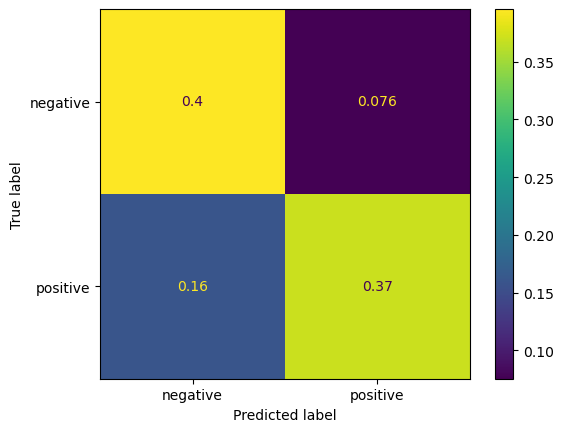

In [119]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

plot_confusion_matrix(MNB, X_test, Y_test, normalize='all')

In [120]:
#For Model Testing
test_data = pd.read_csv('sampled2.csv')
test_data = test_data[test_data.Sentiment != "neutral"]

In [121]:
test_data.Sentiment.value_counts()

positive    52
negative    35
Name: Sentiment, dtype: int64

In [122]:
test_label = test_data['Sentiment'].tolist()
test_sentence = test_data['Sentence'].tolist()
test_counts = cv.transform(test_data['Sentence'])
test_predicted = MNB.predict(test_counts)
score = metrics.accuracy_score(test_predicted, test_label)
print("Accuracy Score: ", score)

Accuracy Score:  0.4942528735632184
